# Topics

## 1. DFT and Power Spectrum -- Lecture Slides

In [1]:
'''Complex numbers in numpy'''

import numpy as np
a = 1 + 2j
b = np.conj(a)
c = np.conj(b)
print b
print c
print b*b.conj()

(1-2j)
(1+2j)
(5+0j)


In [2]:
def playsound(rate, sndarr):
    from scipy.io.wavfile import write
    import os
    write('tmp.wav', rate, sndarr)
    os.system("afplay tmp.wav") 
    os.system("rm tmp.wav") 
    return

## In what follows:
## tone_data: y_k
## ft = np.fft(tone_data): Y_n

In [6]:
%matplotlib inline
'''

fftfreg

from http://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html

numpy.fft.fftfreq(n, d=1.0)[source]
Return the Discrete Fourier Transform sample frequencies.

The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with zero at the start). For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length n and a sample spacing d:

f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd


Parameters:
n : int
Window length.
d : scalar, optional
Sample spacing (inverse of the sampling rate). Defaults to 1.
Returns:
f : ndarray
Array of length n containing the sample frequencies.


*************************************************************************
1. PAY ATTENTION TO THE MAXIMUM FREQUENCEY (NYQUIST FREQUENCY): 
IT IS *NOT* 1/sample_rate, BUT (1/2)(1/sample_rate)!!


2. ft[0] actually gives the total and NOT the mean.

3. Pay attention to the DC component.

*************************************************************************


'''


import matplotlib.pyplot as plt
import numpy as np

sample_rate = 44100.

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**14


tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts)) 

# If you want to see a purely DC signal:
DC = 4
tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts)) + DC

if len(tone_data)%2:
    print "WARNING: length of data is NOT even."
    print'\a'


playsound(sample_rate, tone_data)

#tone_data = np.float64(tone_data)

ft = np.fft.fft(tone_data)

freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)

N = len(tone_data)

#This shows the zero-freq term actually gives the sum, and is therefore always real for real data
# numpy documentation is wrong (which says that the zeroth term give!
print 'Zero freqeuncy and zero frequence term', freq[0], ft[0]
print 'Zero freqeuncy and (zero frequence term)/N', freq[0], ft[0]/N
print 'Mean of signal', tone_data.mean()

# Nyquist Frequency
print 'Maximum frequency', np.abs(freq).max()
print 'Nyquist term', ft[N/2]
print 'Nyquist frequency (note its reality)', freq[N/2]
print 'Freq before and after the Nyquist frequency', freq[N/2-1], freq[N/2+1]
print "Terms before and after the Nyquist term (note they're cc of each other, but not perfectly so)", \
      ft[len(tone_data)/2-1], ft[len(tone_data)/2+1]


# numpy documentation is wrong:
print "N:", N
print "Number of postive frequency terms (expect N/2):", np.sum(freq > 0)
print "Number of negative frequency terms (expect N/2 - 1):", np.sum(freq < 0)


Zero freqeuncy and zero frequence term 0.0 (352800+0j)
Zero freqeuncy and (zero frequence term)/N 0.0 (4+0j)
Mean of signal 4.0
Maximum frequency 22050.0
Nyquist term (-280+1.60014224093e-11j)
Nyquist frequency (note its reality) -22050.0
Freq before and after the Nyquist frequency 22049.5 -22049.5
Terms before and after the Nyquist term (note they're cc of each other, but not perfectly so) (-378.872962037+0.0134950625417j) (-378.872962037-0.0134950625089j)
N: 88200
Number of postive frequency terms (expect N/2): 44099
Number of negative frequency terms (expect N/2 - 1): 44100


## A[0] contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then A[1:n/2-1] contains the positive-frequency terms, and A[n/2:] contains the negative-frequency terms,  in order of decreasingly negative frequency. For an even number of input points, A[n/2] represents both positive and negative Nyquist frequency, and is also purely real for real input.

Modified from: http://docs.scipy.org/doc/numpy/reference/routines.fft.html


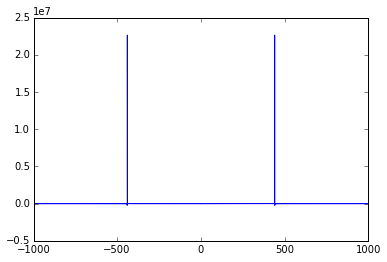

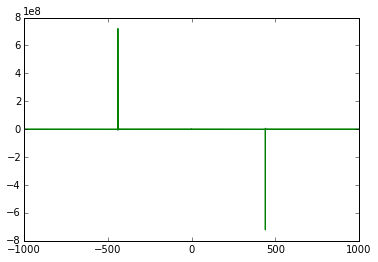

In [5]:
'''
Real part is not exactly zero due to numerical inaccuracy 
-- it can be reduced by increasing sampling rate; try sample_rate = 1048576. in the above cell.

''' 

# illustrate how freq is arranged before argsort, and explain the purpose of np.argsort()
# idx = np.argsort(freq)
# sp = sp[idx]
# freq = freq[idx]


plt.figure()
plt.plot(freq, ft.real, 'b-')
#plt.xlim([420, 460])
plt.xlim([-1000, 1000])
plt.figure()
plt.plot(freq, ft.imag, 'g-')
#plt.xlim([420, 460])
plt.xlim([-1000, 1000])
plt.show()


## Why are there a negative frequency and a positive frequency?

## It's simply Euler's Forumla:
## sin(2πft) = [exp(2iπft) - exp(-2iπft)]/2i

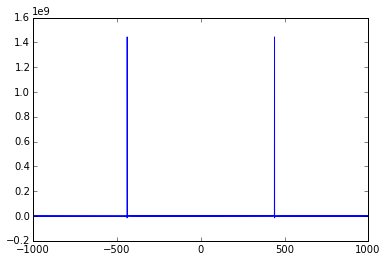

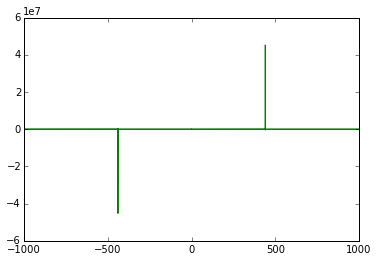

In [8]:
%matplotlib inline
'''

Before you run this -- what do you expect to get?

Here the imaginary part is not exactly zero due to numerical inaccuracy 
-- it can be reduced by increasing sampling rate; try sample_rate = 1048576.  (2^20)

'''

import matplotlib.pyplot as plt

sample_rate = 44100.

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**15
tone_data_cos = np.int16(amp*np.cos(np.pi*2*f*time_pts))

playsound(sample_rate, tone_data_cos)


ft_cos = np.fft.fft(tone_data_cos)

freq = np.fft.fftfreq(tone_data_cos.shape[0], d = 1/sample_rate)

plt.figure()
plt.plot(freq, ft_cos.real, 'b-')
plt.xlim([-1000, 1000])
plt.figure()
plt.plot(freq, ft_cos.imag, 'g-')
plt.xlim([-1000, 1000])
plt.show()



## Inverse FFT

max of the imaginary part 0


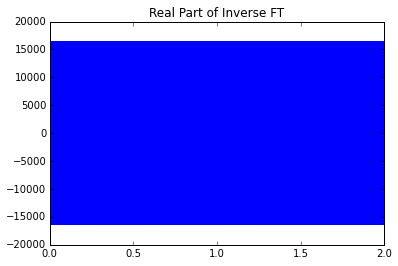

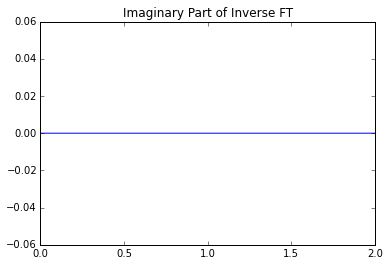

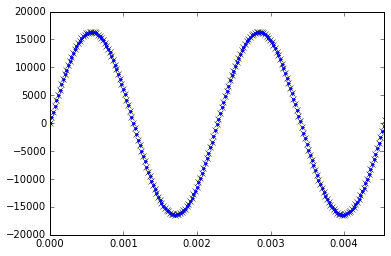

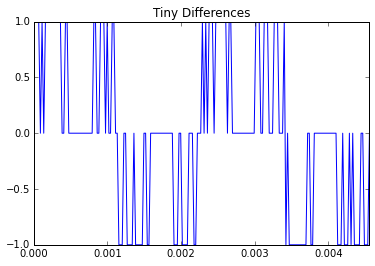

In [9]:
tone_data_rec = np.fft.ifft(ft)
tone_data_rec = np.int16(tone_data_rec.real)

plt.figure()
plt.title('Real Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.real)


plt.figure()
plt.title('Imaginary Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.imag)
print 'max of the imaginary part', tone_data_rec.imag.max()

# Rejecting the imaginary part
tone_data_rec = tone_data_rec.real

plt.figure()
plt.plot(time_pts, tone_data, 'kx') 
plt.plot(time_pts, tone_data_rec, 'b.')
plt.xlim([0, 2/440.])

plt.figure()
plt.title('Tiny Differences')
plt.plot(time_pts, tone_data-tone_data_rec)
plt.xlim([0, 2/440.])

plt.show()

In [10]:
#playsound(sample_rate, tone_data)
playsound(sample_rate, tone_data_rec)

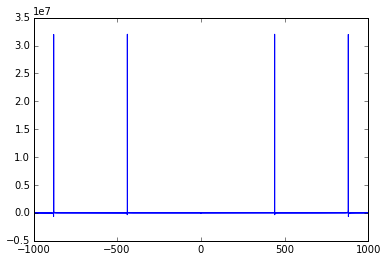

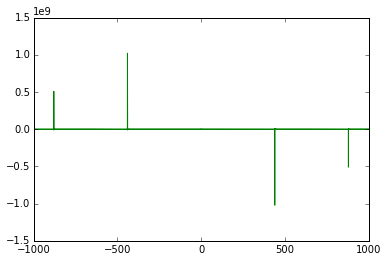

In [11]:
%matplotlib inline
'''

Two-frequency signal (No Parseval's Theorem)

'''

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

sample_rate = 44100.
#The following sample_rate is much better in showing the fft should be purely imaginary.
#sample_rate = 1048576.

duration = 2.
amp = 2**14

f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)


tone_data1 = np.int16(amp*np.sin(np.pi*2*f*time_pts))



f = 440.*2
time_pts = np.linspace(0, duration, duration*sample_rate)
tone_data2 = np.int16(amp*np.sin(np.pi*2*f*time_pts))

# equal weights
tone_data1 *= 2/np.sqrt(2)
tone_data2 *= 1/np.sqrt(2)

# unequal weights
#tone_data1 *= 1/np.sqrt(5)
#tone_data2 *= 2/np.sqrt(5)

tone_data =  np.int16( tone_data1 + tone_data2 )


playsound(sample_rate, tone_data)


ft = np.fft.fft(tone_data)
freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)


plt.figure()
plt.plot(freq, ft.real, 'b-')
plt.xlim([-1000, 1000])
plt.figure()
plt.plot(freq, ft.imag, 'g-')
plt.xlim([-1000, 1000])
plt.show()




max of the imaginary part 0


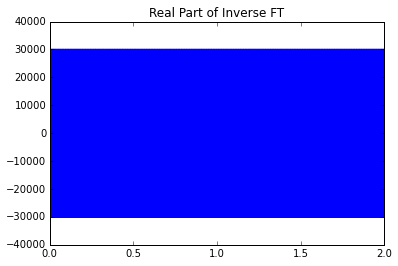

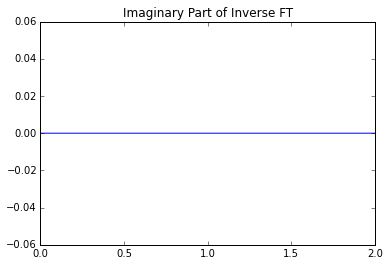

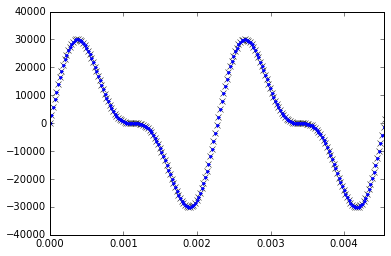

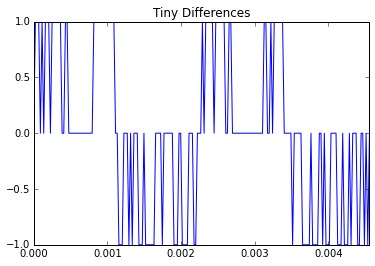

In [12]:
tone_data_rec = np.fft.ifft(ft)
tone_data_rec = np.int16(tone_data_rec.real)

plt.figure()
plt.title('Real Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.real)


plt.figure()
plt.title('Imaginary Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.imag)
print 'max of the imaginary part', tone_data_rec.imag.max()

# Rejecting the imaginary part
tone_data_rec = tone_data_rec.real

plt.figure()
plt.plot(time_pts, tone_data, 'kx') 
plt.plot(time_pts, tone_data_rec, 'b.')
plt.xlim([0, 2/440.])

plt.figure()
plt.title('Tiny Differences')
plt.plot(time_pts, tone_data-tone_data_rec)
plt.xlim([0, 2/440.])

plt.show()

In [13]:
#playsound(sample_rate, tone_data)
playsound(sample_rate, tone_data_rec)

max of the imaginary part 0


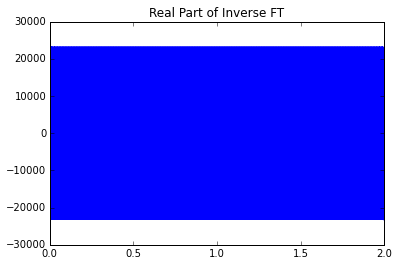

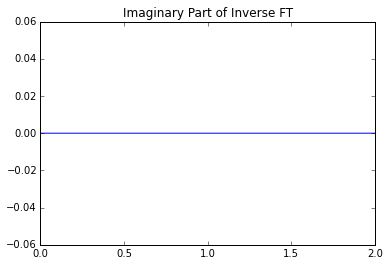

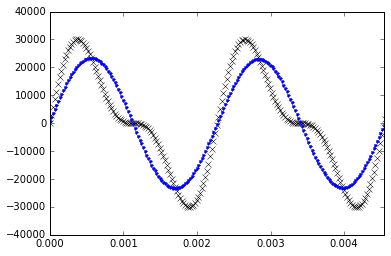

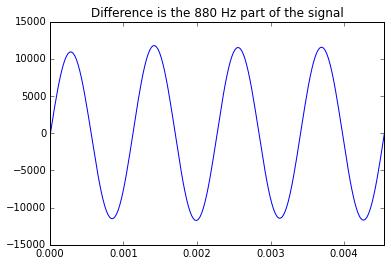

In [14]:
filt = np.abs(freq) < 500. #boolean array with same length as freq
ft *= filt #gets rid of frequencies higher than 500

tone_data_rec = np.fft.ifft(ft)
tone_data_rec = np.int16(tone_data_rec.real)

plt.figure()
plt.title('Real Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.real)


plt.figure()
plt.title('Imaginary Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.imag)
print 'max of the imaginary part', tone_data_rec.imag.max()

# Rejecting the imaginary part
tone_data_rec = tone_data_rec.real

plt.figure()
plt.plot(time_pts, tone_data, 'kx') 
plt.plot(time_pts, tone_data_rec, 'b.')
plt.xlim([0, 2/440.])

plt.figure()
plt.title('Difference is the 880 Hz part of the signal')
plt.plot(time_pts, tone_data-tone_data_rec)
plt.xlim([0, 2/440.])

plt.show()

In [15]:
# Now we get the pure A tone back
playsound(sample_rate, tone_data_rec)

## Breakout: write functions get_tone() and plot_fourier().

## gen_tone(f, duration, sample_rate = 44100, amp = 2**13, play_sound = False) returns the numpy array for a tone.

## plot_fourier(sample_rate, signal, freq_lim = 1000.) plots the real and imaginary parts of the signal, and returns ft and freq.

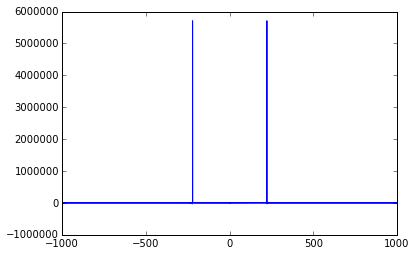

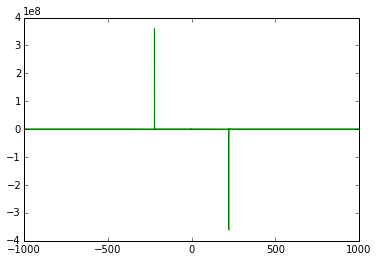

(array([ 0.00000000 +0.j        , -0.00234525+65.84259543j,
         0.00685836-96.27400244j, ...,  0.00990830+92.72491173j,
         0.00685836+96.27400244j, -0.00234525-65.84259543j]),
 array([ 0. ,  0.5,  1. , ..., -1.5, -1. , -0.5]))

In [26]:
def get_tone(f, duration, sample_rate = 44100, amp = 2**13, play_sound = False):
    
    time_pts = np.linspace(0, duration, duration*sample_rate)
    tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts))
    if play_sound == True:
        playsound(sample_rate, tone_data)
    return tone_data

def plot_fourier(tone_data, sample_rate = 44100, freq_lim = 1000.):
    
    ft = np.fft.fft(tone_data)
    freq = np.fft.fftfreq(tone_data.shape[0], d = 1./sample_rate)
    
    plt.figure()
    plt.plot(freq, ft.real, 'b-')
    plt.xlim([-freq_lim, freq_lim])
    plt.figure()
    plt.plot(freq, ft.imag, 'g-')
    plt.xlim([-freq_lim, freq_lim])
    plt.show()
    
    return ft, freq

plot_fourier(get_tone(222, 2))

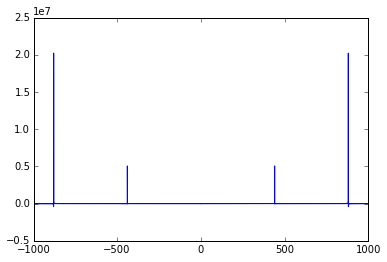

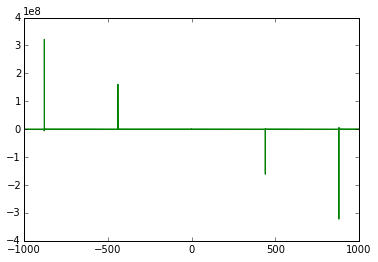

In [21]:
f = 440.
sample_rate = 44100
tone1 = get_tone(f, 2.)
tone2 = get_tone(f*2, 2.)

tone1 *= 1/np.sqrt(5.)
tone2 *= 2/np.sqrt(5.)

tone = np.int16(tone1 + tone2)
playsound(sample_rate, tone)
ft, freq = plot_fourier(sample_rate, tone)



## ## Breakout: write a function 

## signal_rec(ft, freq, filt = None)

## that does inverse fft and returns the array of sound data.

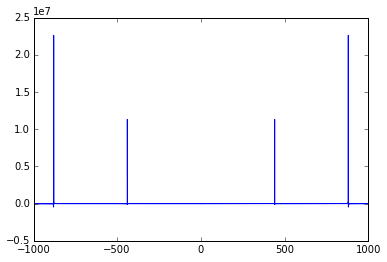

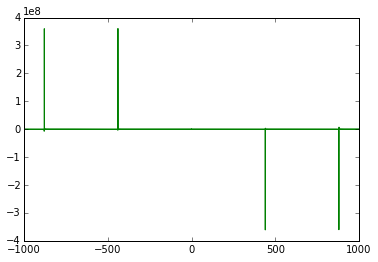

In [28]:
def signal_rec(ft, freq, filt = None):
    
    import copy
    ft_filt = copy.copy(ft)
    try:
        len(filt)
    except:
        pass
    else:
        ft_filt *= filt
        
    recov_snd = np.fft.ifft(ft_filt)
    recov_snd = np.int16(recov_snd.real)
    return recov_snd

ft, freq = plot_fourier(get_tone(440, 2) + get_tone(880, 2))

sound_rec = signal_rec(ft, freq)
filt = np.abs(freq) < 500.
sound_rec = signal_rec(ft, freq, filt = filt)
playsound(44100, sound_rec)



max of the imaginary part 0


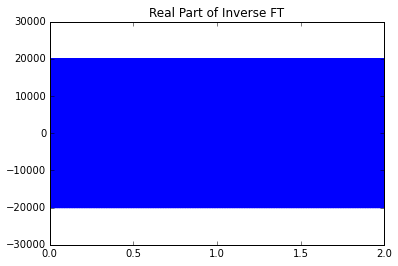

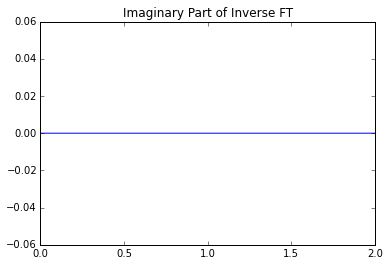

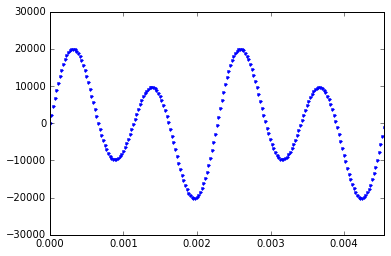

In [32]:
# Make sure we can get original sound back

tone_data_rec = signal_rec(ft, freq, filt = None)
playsound(sample_rate, tone_data_rec)

max of the imaginary part 0


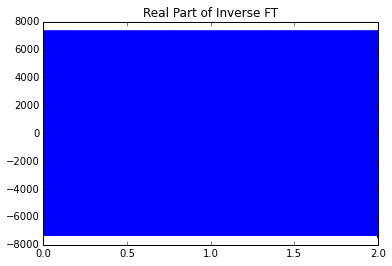

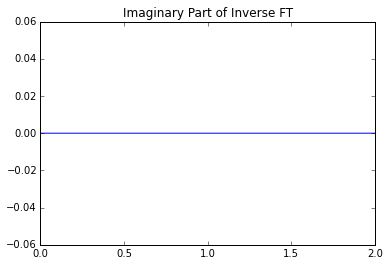

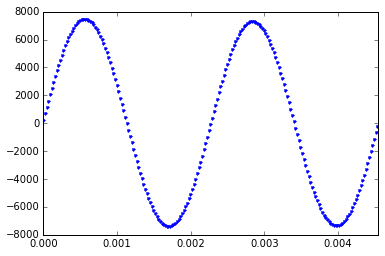

In [33]:
filt = np.abs(freq) < 500.
tone_data_rec = signal_rec(ft, freq, filt = filt)
playsound(sample_rate, tone_data_rec)

max of the imaginary part 0


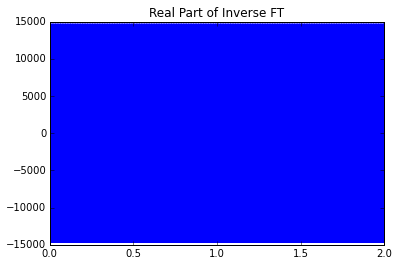

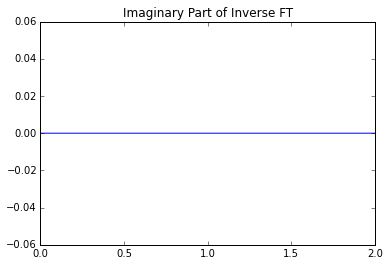

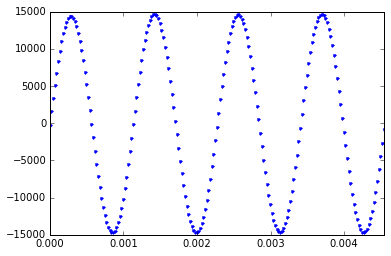

In [34]:
filt = np.abs(freq) > 500.
tone_data_rec = signal_rec(ft, freq, filt = filt)
playsound(sample_rate, tone_data_rec)

rate 44100
data type int16
(10133592, 2)
(176400, 2)
(176400,)


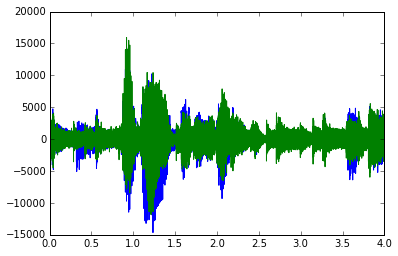

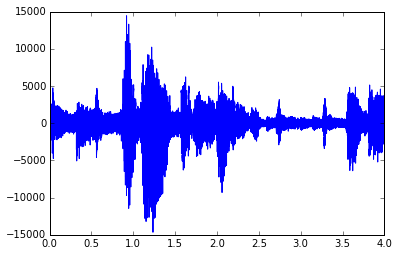

In [35]:
%matplotlib inline
'''Barry White'''
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import os
rate, barry_white = read("BarryWhite.wav")
#numpy.array(a[1],dtype=float)
#dolphin_snd = np.array(a[1], dtype = float)
print 'rate', rate
print 'data type', barry_white.dtype

# It has two columns: stereosound!
print barry_white.shape
start_time = 1
end_time = 5
duration = end_time - start_time
time_pts = np.arange(0, duration*rate)
shortBW = barry_white[start_time*rate: end_time*rate, :]
print shortBW.shape
plt.plot(np.float64(time_pts)/rate, shortBW)

# shortBW = shortBW/2
# print 'data type', shortBW.dtype


# just one channel
shortBW = shortBW[:, 0]
print shortBW.shape
# shortBW = shortBW/2
# print 'data type', shortBW.dtype


playsound(rate, shortBW)

# write('shortBW.wav', rate, shortBW)
# os.system('afplay shortBW.wav')
plt.figure()
plt.plot(np.float64(time_pts)/rate, shortBW)
plt.show()




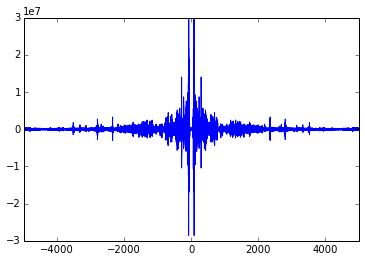

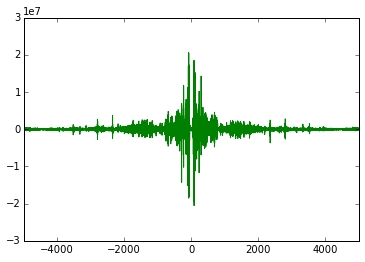

max of the imaginary part 0


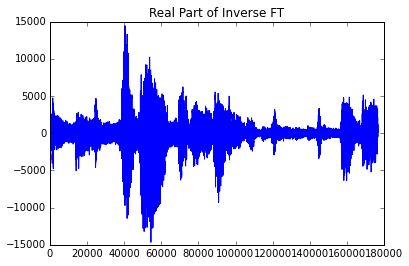

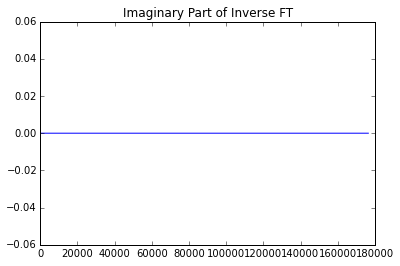

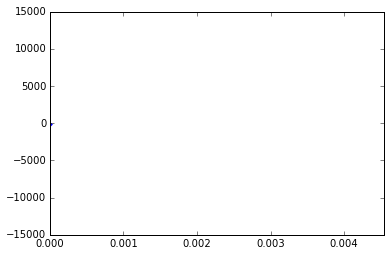

In [36]:
# can we get Barry White back?
ft, freq = plot_fourier(rate, shortBW, freq_lim = 5000.)
BW_rec = signal_rec(ft, freq, filt = None)
playsound(rate, BW_rec)

max of the imaginary part 0


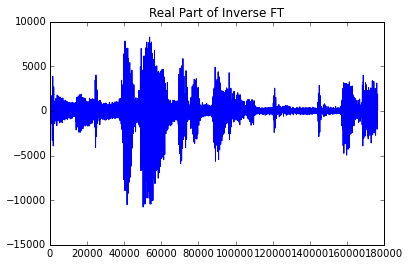

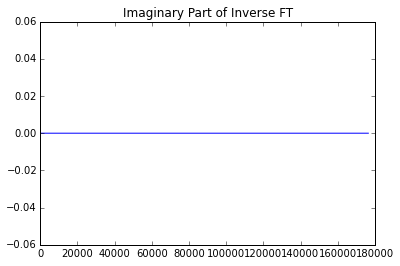

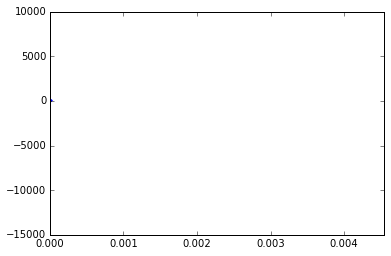

In [38]:
filt = np.abs(freq) < 1000.
BW_base = signal_rec(ft, freq, filt = filt)
playsound(rate, BW_base)

max of the imaginary part 0


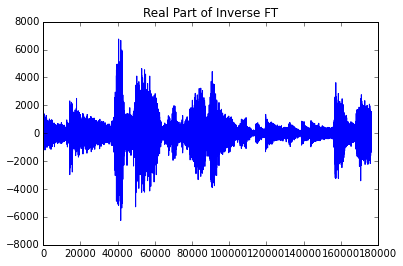

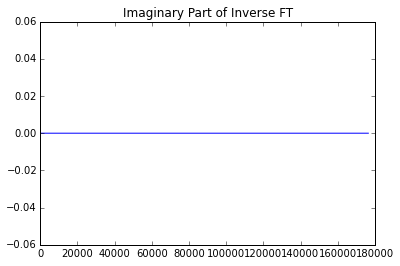

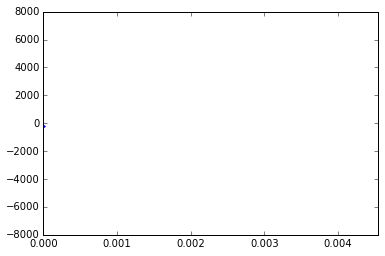

In [39]:
filt = np.abs(freq) > 1000.
BW_hi_pitch = signal_rec(ft, freq, filt = filt)
playsound(rate, BW_hi_pitch)

In [41]:
BW_base *= 4/np.sqrt(17.)
BW_hi_pitch *= 1/np.sqrt(17.)
Ultra_BW = np.int16(BW_base + BW_hi_pitch)

Ultra_BW *= shortBW.max()/Ultra_BW.max()

playsound(rate, shortBW)
playsound(rate, Ultra_BW)

#playsound(rate, BW_hi_pitch)

## End of week 10